# Detecting Cat Images Through Neural Networks

In [9]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

### Load The Data i.e Images

In [10]:
def load_and_preprocess_images(cat_dir, noncat_dir, image_size=(64, 64)):
    def process(directory, label):
        images, labels = [], []
        for filename in os.listdir(directory):
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                path = os.path.join(directory, filename)
                img = Image.open(path).convert('RGB').resize(image_size)
                images.append(np.array(img) / 255.0)  # normalize
                labels.append(label)
        return np.array(images), np.array(labels)

    cat_imgs, cat_labels = process(cat_dir, 1)
    noncat_imgs, noncat_labels = process(noncat_dir, 0)

    X = np.concatenate((cat_imgs, noncat_imgs), axis=0)
    y = np.concatenate((cat_labels, noncat_labels), axis=0)

    # Flatten images
    X_flat = X.reshape(X.shape[0], -1)
    return X_flat, y

### Load train/test data

In [13]:
train_cat_dir = "images/cats/train/"
train_noncat_dir = "images/non-cats/train/"
test_cat_dir = "images/cats/test/"
test_noncat_dir = "images/non-cats/test/"

### Transpose to shape

In [14]:
X_train, y_train = load_and_preprocess_images(train_cat_dir, train_noncat_dir)
X_test, y_test = load_and_preprocess_images(test_cat_dir, test_noncat_dir)

## Building the Neural network


In [15]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Training the model


In [17]:
model.fit(X_train, y_train, epochs = 18, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/18


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.7586 - loss: 0.5807 - val_accuracy: 0.8182 - val_loss: 0.3287
Epoch 2/18
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7586 - loss: 0.4930 - val_accuracy: 0.9091 - val_loss: 0.3384
Epoch 3/18
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7586 - loss: 0.5559 - val_accuracy: 0.9091 - val_loss: 0.3584
Epoch 4/18
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7931 - loss: 0.4342 - val_accuracy: 0.8182 - val_loss: 0.3333
Epoch 5/18
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8103 - loss: 0.3813 - val_accuracy: 0.8182 - val_loss: 0.3271
Epoch 6/18
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8276 - loss: 0.3753 - val_accuracy: 0.8182 - val_loss: 0.3229
Epoch 7/18
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8448 - loss: 0.4007 - val_accuracy: 0.9091 - val_loss: 0.2730
Epoch 8/18
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7931 - loss: 0.3909 - val_accuracy: 0.9091 - val_loss: 0.2823
Epoch 9/18


In [18]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9091 - loss: 0.2026
Test Loss: 0.20259588956832886, Test Accuracy: 0.9090909361839294


### Testing the model with input

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


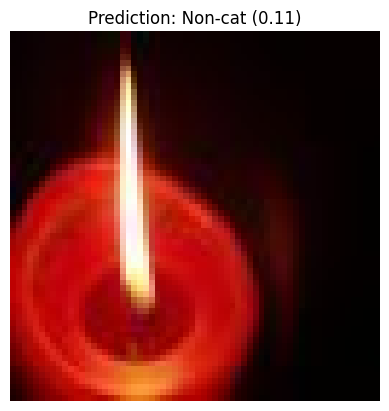

In [19]:
def predict_image(image_path, model, image_size=(64, 64)):
    # Load and preprocess the image
    img = Image.open(image_path).convert('RGB').resize(image_size)
    img_array = np.array(img) / 255.0
    img_flat = img_array.reshape(1, -1)  # Shape: (1, 64*64*3)

    # Predict
    prob = model.predict(img_flat)[0][0]
    pred = int(prob > 0.5)

    # Show image with prediction
    plt.imshow(img)
    plt.title(f"Prediction: {'Cat' if pred else 'Non-cat'} ({prob:.2f})")
    plt.axis('off')
    plt.show()

# Example usage
predict_image("images/another_pic.jpg", model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


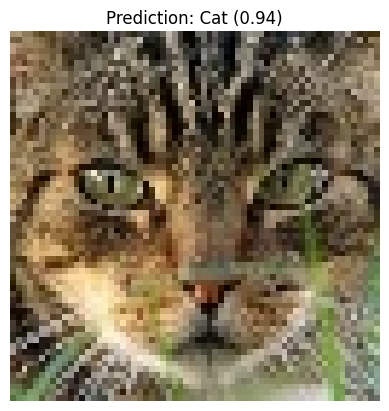

In [21]:
predict_image("images/cat_image.png", model)